# DEMO

In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), 'scripts'))

import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from math import sqrt
from attack import attacks
from detection import detection
from embedding2 import *
from ROC import *



#WPSNR funzione
def wpsnr(img1, img2):
  img1 = np.float32(img1)/255.0
  img2 = np.float32(img2)/255.0
  difference = img1-img2
  same = not np.any(difference)
  if same is True:
      return 150
  w = np.genfromtxt('csf.csv', delimiter=',')
  ew = convolve2d(difference, np.rot90(w,2), mode='valid')
  decibels = 20.0*np.log10(1.0/sqrt(np.mean(np.mean(ew**2))))
  return decibels

## Embedding

WPSNR:  44.1687194568237


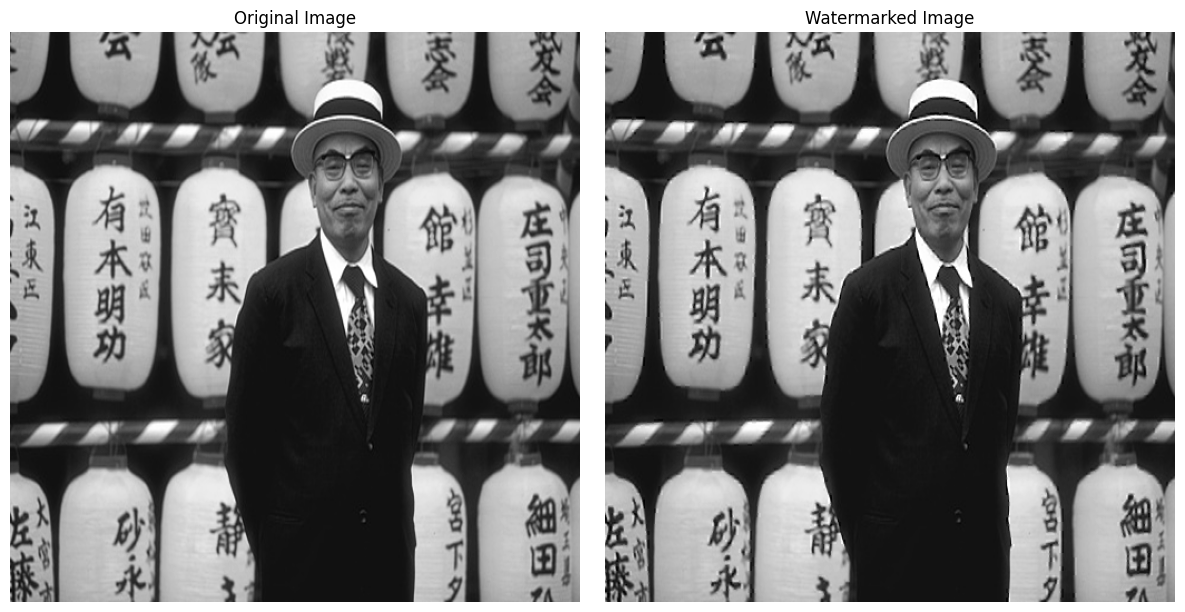

'\n\n\n# Carica il watermark\nwatermark = np.load(\'mediavault.npy\')\n\n# Cartella contenente le immagini\nfolder_path = \'./images\'\n\n# Inizializza variabili per la somma e il conteggio dei WPSNR\ntotal_wpsnr = 0\nvalid_images = 0\n\n# Funzione per calcolare il WPSNR\ndef wpsnr(original, watermarked):\n    original = original.astype(np.float64)\n    watermarked = watermarked.astype(np.float64)\n    \n    diff = original - watermarked\n    mse = np.mean(diff ** 2)\n    if mse == 0:\n        return float(\'inf\')\n    \n    max_pixel_value = 255.0\n    psnr = 20 * np.log10(max_pixel_value / np.sqrt(mse))\n    \n    return psnr\n\n# Itera sulle immagini dalla 0001.bmp alla 0100.bmp\nfor i in range(1, 101):\n    image_filename = f\'{i:04d}.bmp\'\n    image_path = os.path.join(folder_path, image_filename)\n    \n    if os.path.exists(image_path):\n        print(f"Processing {image_filename}...")\n        \n        # Carica l\'immagine originale\n        original_image = cv2.imread(image

In [2]:
watermark = np.load('mediavault.npy')

image_path = './images/0080.bmp'

watermarked_image = embedding2(image_path, watermark)


original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

image_wpsnr=wpsnr(original_image, watermarked_image)
print("WPSNR: ", image_wpsnr)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)  
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')  

plt.subplot(1, 3, 2) 
plt.imshow(watermarked_image, cmap='gray')
plt.title('Watermarked Image')
plt.axis('off')

plt.tight_layout()
plt.show() 


"""


# Carica il watermark
watermark = np.load('mediavault.npy')

# Cartella contenente le immagini
folder_path = './images'

# Inizializza variabili per la somma e il conteggio dei WPSNR
total_wpsnr = 0
valid_images = 0

# Funzione per calcolare il WPSNR
def wpsnr(original, watermarked):
    original = original.astype(np.float64)
    watermarked = watermarked.astype(np.float64)
    
    diff = original - watermarked
    mse = np.mean(diff ** 2)
    if mse == 0:
        return float('inf')
    
    max_pixel_value = 255.0
    psnr = 20 * np.log10(max_pixel_value / np.sqrt(mse))
    
    return psnr

# Itera sulle immagini dalla 0001.bmp alla 0100.bmp
for i in range(1, 101):
    image_filename = f'{i:04d}.bmp'
    image_path = os.path.join(folder_path, image_filename)
    
    if os.path.exists(image_path):
        print(f"Processing {image_filename}...")
        
        # Carica l'immagine originale
        original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        # Applica il watermark all'immagine (puoi sostituire 'embedding2' con la tua funzione)
        watermarked_image = embedding2(image_path, watermark)
        
        # Calcola il WPSNR tra l'immagine originale e quella con watermark
        image_wpsnr = wpsnr(original_image, watermarked_image)
        print(f"WPSNR for {image_filename}: {image_wpsnr}")
        
        # Accumula il WPSNR totale e conta le immagini valide
        total_wpsnr += image_wpsnr
        valid_images += 1
    else:
        print(f"Image {image_filename} not found.")

# Calcola la media del WPSNR
if valid_images > 0:
    average_wpsnr = total_wpsnr / valid_images
    print(f"\nProcessed {valid_images} images.")
    print(f"Average WPSNR: {average_wpsnr}")
else:
    print("No valid images found to process.")

"""


## Attack

In [ ]:
#attacked_image = attacks(watermarked_image, 'blur', 1)
#attacked_image = attacks(watermarked_image, 'awgn', [5, 42])
#attacked_image = attacks(watermarked_image, 'sharpening', [0.3, 0.5])
#attacked_image = attacks(watermarked_image, 'median', 3)
attacked_image = attacks(watermarked_image, 'resize', 0.9)
#attacked_image = attacks(watermarked_image, 'jpeg', 5)
##attacked_image = attacks(watermarked_image, ['resize','blur'], [0.75,1])

## Detection

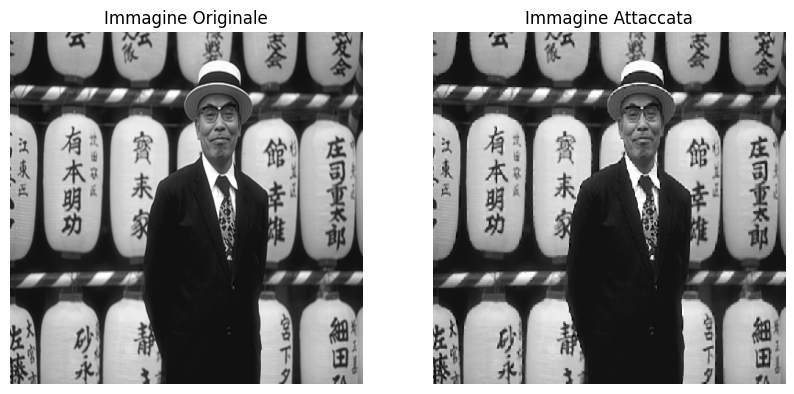

Il watermark è stato distrutto.
WPSNR tra l'immagine watermarked e quella attaccata: 35.877581096864276 dB


In [10]:
#attacked_image = attacks(watermarked_image, 'sharpening', [0.4,0.2])
attacked_image = attacks(watermarked_image, 'resize', 0.75)

output1, output2 = detection(original_image, watermarked_image, attacked_image)

plt.figure(figsize=(10, 5))

# Plotta l'immagine originale
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Immagine Originale')
plt.axis('off')

# Plotta l'immagine attaccata
plt.subplot(1, 2, 2)
plt.imshow(attacked_image, cmap='gray')
plt.title('Immagine Attaccata')
plt.axis('off')

# Mostra il plot
plt.show()


# 3. Mostra i risultati della detection
if output1 == 1:
    print("Il watermark è presente nell'immagine attaccata.")
else:
    print("Il watermark è stato distrutto.")

print(f"WPSNR tra l'immagine watermarked e quella attaccata: {output2} dB")

## ROC

In [5]:
# Esegui il processo di stima della soglia
folder_path = "./images"  # Sostituisci con il percorso effettivo
images = load_images_from_folder(folder_path)
original_watermark = watermark = np.load('mediavault.npy')

# Stima la soglia con il processo di detection
#threshold = estimate_threshold(images, original_watermark)
estimate_threshold(images, original_watermark)
#print(f"Optimal threshold: {threshold}")

00
Applico sharpening
01
Applico sharpening
02
Applico JPEG compression
03
Applico median
04
Applico sharpening
05
Applico median
06
Applico AWGN
07
Applico JPEG compression
08
Applico AWGN
09
Applico blur
010
Applico sharpening
011
Applico median
012
Applico sharpening
013
Applico AWGN
014
Applico JPEG compression
015
Applico median
016
Applico median
017
Applico median
018
Applico JPEG compression
019
Applico JPEG compression
10
Applico JPEG compression
11
Applico median
12
Applico median
13
Applico sharpening
14
Applico JPEG compression
15
Applico blur
16
Applico median
17
Applico sharpening
18
Applico JPEG compression
19
Applico JPEG compression
110
Applico sharpening
111
Applico no attack
112
Applico sharpening
113
Applico AWGN
114
Applico blur
115
Applico blur
116
Applico no attack
117
Applico blur
118
Applico sharpening
119
Applico AWGN
20
Applico JPEG compression
21
Applico blur
22
Applico no attack
23
Applico blur
24
Applico no attack
25
Applico median
26
Applico AWGN
27
Appli

KeyboardInterrupt: 